<a href="https://colab.research.google.com/github/riyamotwaniii/bml-exp-1-12/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

exp -7 knn

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


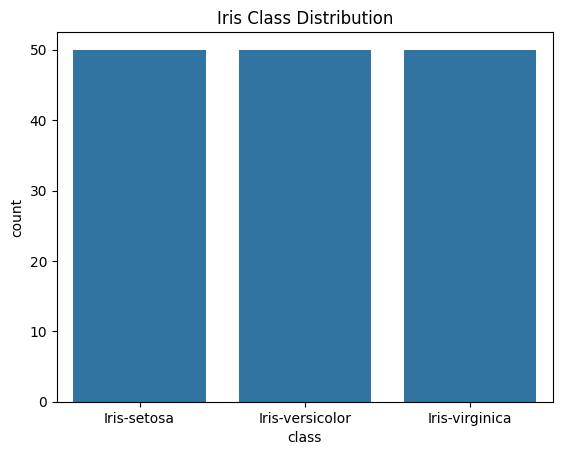

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset from UCI repo or sklearn
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Iris columns
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load dataset
df = pd.read_csv(url, header=None, names=columns)

print(df.head())
print(df.info())

# Check class distribution
sns.countplot(x='class', data=df)
plt.title('Iris Class Distribution')
plt.show()


In [ ]:
# Encode class labels as numbers
class_mapping = {label: idx for idx, label in enumerate(df['class'].unique())}
df['class'] = df['class'].map(class_mapping)

# Separate features and target
X = df.drop(columns=['class']).values
y = df['class'].values

# Shuffle data
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Split 80-20 train-test
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]
        values, counts = np.unique(k_labels, return_counts=True)
        majority_label = values[np.argmax(counts)]
        y_pred.append(majority_label)
    return np.array(y_pred)

In [ ]:
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Accuracy on Iris dataset with manual KNN (k={k}): {accuracy:.4f}')


Accuracy on Iris dataset with manual KNN (k=5): 0.9667


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['class']))

X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]

y_pred_scaled = knn_predict(X_train, y_train, X_test, k)
accuracy_scaled = np.sum(y_pred_scaled == y_test) / len(y_test)
print(f'Accuracy after scaling features: {accuracy_scaled:.4f}')


Accuracy after scaling features: 0.3000


Ready KNN


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with k=3 (you can change k)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier on Iris dataset: {accuracy:.2f}")


Accuracy of KNN classifier on Iris dataset: 1.00
